In [1]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs --break-system-packages
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO --break-system-packages

In [2]:
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/objFuncs
# !pip install -e /files/shared/ap/jupyter-notebook/pkgs/pyBO

In [3]:
# !pip install -e ../../objFuncs
# !pip install -e ../../pyBO

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import objFuncs
from objFuncs import VM
from objFuncs import residuals
from objFuncs.util import plot_obj_history

objFuncs version: 1.1.0. updated on 2023-12-04


In [6]:
def test_fun0(x):
    y = np.ones(3)
    y[:2] = x - 0.2
    y[2] = np.mean(x) - 0.2
    return y

def test_fun1(x):
    y = np.ones(3)
    y[:2] = 2*x - 0.2
    y[2] = 2*np.mean(x)-0.2
    return y

In [7]:
vm0 = VM(
        x0 = np.zeros(2),
        fun = test_fun0,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [8]:
vm1 = VM(
        x0 = np.zeros(2),
        fun = test_fun1,
        decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                        ],
        objective_RDs = [ 
            'FE_MEBT:BPM_D1056:XPOS_RD',
            'FE_MEBT:BPM_D1056:YPOS_RD',
            'FE_MEBT:BPM_D1056:PHASE_RD'],
        )

In [9]:
objFuncs._global_machineIO.fetch_data = vm0.fetch_data
objFuncs._global_machineIO.ensure_set = vm0.ensure_set
objFuncs._global_machineIO._test = True

In [10]:
res = residuals.residualObjMultiConditional(  
    decision_CSETs=['FE_LEBT:PSC2_D0948:I_CSET', 'FE_LEBT:PSC1_D0948:I_CSET',
                   ],
    decision_min= [-3,-3, ],
    decision_max= [ 3, 3, ],
    objective_goal = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 0.0,     #(mm)
            'FE_MEBT:BPM_D1056:YPOS_RD' : 0.0, 
            'FE_MEBT:BPM_D1056:PHASE_RD': 0.0, 
            },
    objective_norm = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:YPOS_RD' : 1.,     
            'FE_MEBT:BPM_D1056:PHASE_RD': 1., 
            },
    objective_weight = { 
            'FE_MEBT:BPM_D1056:XPOS_RD' : 2.,     
            'FE_MEBT:BPM_D1056:YPOS_RD' : 2.,     
            'FE_MEBT:BPM_D1056:PHASE_RD': 1., 
            },
    conditional_SETs = {
                      'FS1_BBS:CSEL_D2405:CTR_MTR.VAL':[-17,17],
                      'FS1_BBS:CSEL_D240array5:GAP_MTR.VAL':[-17,17],
                      },
    )

res.residualObj[0].machineIO = vm0
res.residualObj[1].machineIO = vm1

[condition_controller] ======== class info ========
init_time: 2023-12-15 10:40:10.125150
class_hierarchy: [
    objFuncBase]
machineIO: <objFuncs.construct_machineIO.construct_machineIO object at 0x7f95c38c89a0>
decision_CSETs: [
    FS1_BBS:CSEL_D2405:CTR_MTR.VAL, FS1_BBS:CSEL_D240array5:GAP_MTR.VAL]
decision_min: [-17. -17.]
decision_max: [17. 17.]
decision_bounds: [[-17  17]
 [-17  17]]
decision_RDs: [
    FS1_BBS:CSEL_D2405:CTR_MTR.RBV, FS1_BBS:CSEL_D240array5:GAP_MTR.RBV]
decision_tols: None
decision_couplings: None
history_buffer_size: None
logging_frequency: inf
logging_tag: condition_controler
logging_fname: None
x0: [
    0.5, 0.5]

[condition 0] ======== class info ========
init_time: 2023-12-15 10:40:10.147291
class_hierarchy: [
    residualObj, objFuncBase]
machineIO: <objFuncs.construct_machineIO.construct_machineIO object at 0x7f95cc58f6a0>
decision_CSETs: [
    FE_LEBT:PSC2_D0948:I_CSET, FE_LEBT:PSC1_D0948:I_CSET]
decision_min: [-3. -3.]
decision_max: [3. 3.]
decision_b

In [11]:
x = np.array(res.history['decision_CSETs']['values'])
y = np.array(res.history['objectives']['values'])
x,y

(array([], dtype=float64), array([], dtype=float64))

In [12]:
plot_decision = plot_obj_history(
            res.history['decision_CSETs'],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )

plot_RDs = plot_obj_history(
            res.history['condition0']['objective_RDs'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[0],hdisplay=hdisplay
            )
plot_objs = plot_obj_history(
            res.history['condition0']['objectives'],
            keys=[  ['FE_MEBT:BPM_D1056:XPOS_RD','FE_MEBT:BPM_D1056:YPOS_RD'],
                    ['FE_MEBT:BPM_D1056:PHASE_RD'],
                 ],
#             fig=fig,ax=ax[1],hdisplay=hdisplay
            )
callbacks = [plot_decision,plot_RDs,plot_objs]

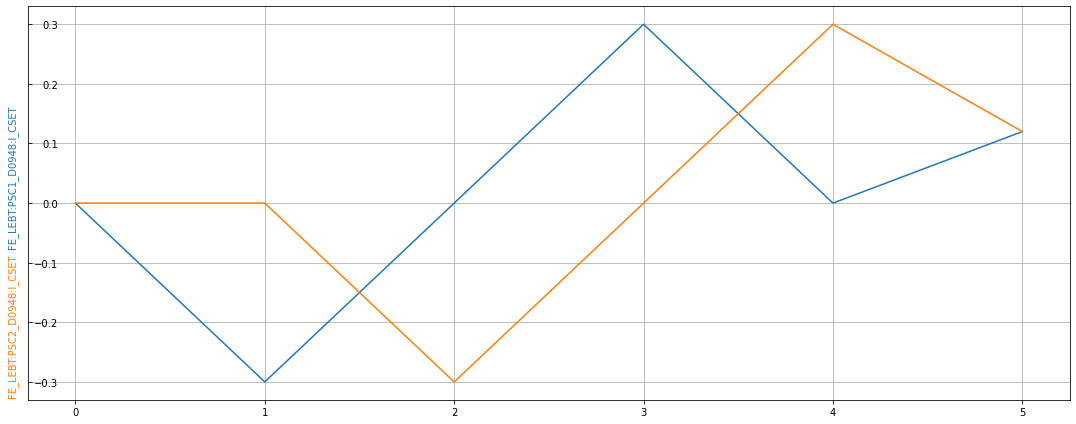

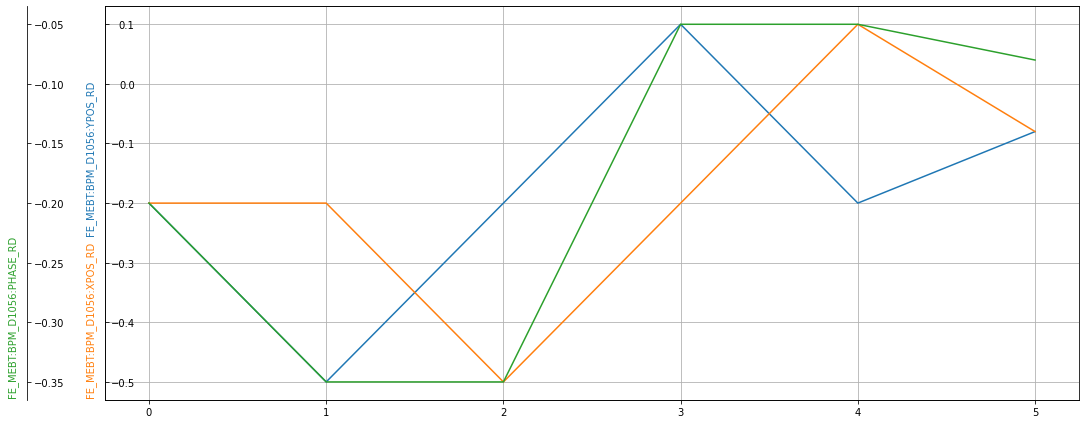

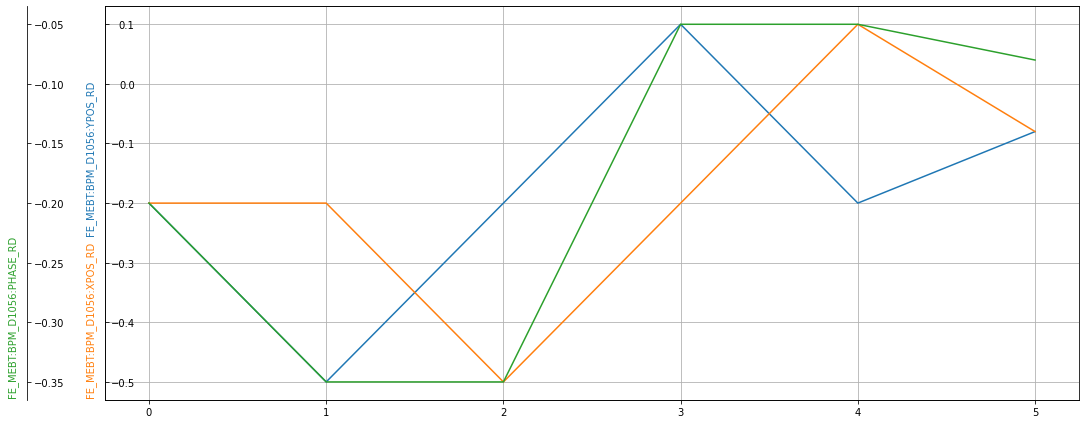

In [13]:
result = res.lsq_linear(jac_use3points=True,callbacks=callbacks)
for f in callbacks:
    f.close()

In [14]:
result.x

array([0.12, 0.12])

In [15]:
res.history['condition0']['jacobian']["values"]

[array([1.2, 0. , 0. , 1.2, 0.3, 0.3])]

In [16]:
res.history['condition1']['jacobian']["values"]

[array([2.4, 0. , 0. , 2.4, 0.6, 0.6])]

In [17]:
res.history.keys()

dict_keys(['time', 'decision_CSETs', 'decision_RDs', 'condition0', 'condition1', 'condition controller', 'objectives'])

In [18]:
res.history['condition controller']

{'time': [datetime.datetime(2023, 12, 15, 10, 40, 10, 271955),
  datetime.datetime(2023, 12, 15, 10, 40, 10, 340391),
  datetime.datetime(2023, 12, 15, 10, 40, 10, 410852),
  datetime.datetime(2023, 12, 15, 10, 40, 10, 424417)],
 'decision_CSETs': {'names': ['FS1_BBS:CSEL_D2405:CTR_MTR.VAL',
   'FS1_BBS:CSEL_D240array5:GAP_MTR.VAL'],
  'values': [array([-17, -17]),
   array([17, 17]),
   array([17, 17]),
   array([-17, -17])]},
 'decision_RDs': {'names': ['FS1_BBS:CSEL_D2405:CTR_MTR.RBV',
   'FS1_BBS:CSEL_D240array5:GAP_MTR.RBV'],
  'values': []}}

In [19]:
res.residualObj[0].objective_weight

OrderedDict([('FE_MEBT:BPM_D1056:XPOS_RD', 2.0),
             ('FE_MEBT:BPM_D1056:YPOS_RD', 2.0),
             ('FE_MEBT:BPM_D1056:PHASE_RD', 1.0)])